In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amazon_delivery.csv")

In [3]:
df.shape

(43739, 16)

In [4]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [6]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [8]:
# Fill missing numeric values (Agent_Rating with median)
if "Agent_Rating" in df.columns:
    df["Agent_Rating"] = df["Agent_Rating"].fillna(df["Agent_Rating"].median())

In [9]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [10]:
# Fill missing categorical values ( Weather with unknown)
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].fillna("unknown")

In [11]:
# Feature Engineering - Distance
def haversine(lat1, lon1, lat2, lon2):
    """Calculate Haversine distance (km) between two lat/lon points."""
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2]) # Convert degrees → radians
    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula core (a)
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    # Angular distance (c)
    c = 2 * np.arcsin(np.sqrt(a))
    # Final distance
    return R * c

In [12]:
# Add Distance_km column
if all(c in df.columns for c in ["Store_Latitude","Store_Longitude","Drop_Latitude","Drop_Longitude"]):
    df["Distance_km"] = haversine(
        df["Store_Latitude"], df["Store_Longitude"],
        df["Drop_Latitude"], df["Drop_Longitude"]
    )

In [13]:
# # Data Cleaning
df = df.drop_duplicates()

In [14]:
df.shape

(43739, 17)

In [15]:
# Standardize categorical variables (lowercase + strip whitespace)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [16]:
# Convert Order_Date + Order_Time into a single datetime
df['Order_DateTime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Order_Time'],
                                          errors='coerce')

In [17]:
# Extract time-based features
df['Order_Hour'] = df['Order_DateTime'].dt.hour          # Hour of the day (0-23)
df['Order_DayOfWeek'] = df['Order_DateTime'].dt.dayofweek # 0=Monday, 6=Sunday
df['Order_DayName'] = df['Order_DateTime'].dt.day_name()  # Monday, Tuesday, ...
df['Order_Month'] = df['Order_DateTime'].dt.month         # Month (1-12)

In [18]:
# Create rush hour / weekend flags
df['Is_RushHour'] = df['Order_Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 20 else 0)
df['Is_Weekend'] = df['Order_DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [19]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek,Order_Month,Is_RushHour,Is_Weekend
count,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43648,43648.000000,43648.000000,43648.000000,43739.000000,43739.000000
mean,29.567137,4.633862,17.210960,70.661177,17.459031,70.821842,124.905645,38.561752,2022-03-14 09:55:13.388929536,17.425976,3.000275,2.979839,0.492490,0.274835
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000,1.465067,2022-02-11 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000,4.663432,2022-03-04 22:50:00,15.000000,1.000000,3.000000,0.000000,0.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000,9.220450,2022-03-15 16:35:00,19.000000,3.000000,3.000000,0.000000,0.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000,13.682379,2022-03-27 18:15:00,21.000000,5.000000,3.000000,1.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000,19692.674606,2022-04-06 23:55:00,23.000000,6.000000,4.000000,1.000000,1.000000
std,5.815155,0.334518,7.764225,21.475005,7.342950,21.153148,51.915451,534.564299,NaN,4.818494,1.969665,0.546637,0.499949,0.446436


In [20]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Distance_km         0
Order_DateTime     91
Order_Hour         91
Order_DayOfWeek    91
Order_DayName      91
Order_Month        91
Is_RushHour         0
Is_Weekend          0
dtype: int64

In [21]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Delivery_Time,Category,Distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek,Order_DayName,Order_Month,Is_RushHour,Is_Weekend
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,120,clothing,3.025149,2022-03-19 11:30:00,11.0,5.0,Saturday,3.0,0,1
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,165,electronics,20.183530,2022-03-25 19:45:00,19.0,4.0,Friday,3.0,1,0
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,130,sports,1.552758,2022-03-19 08:30:00,8.0,5.0,Saturday,3.0,1,1
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,105,cosmetics,7.790401,2022-04-05 18:00:00,18.0,1.0,Tuesday,4.0,1,0
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,150,toys,6.210138,2022-03-26 13:30:00,13.0,5.0,Saturday,3.0,0,1


In [22]:
# Find rows where datetime could not be parsed
null_time_rows = df[df['Order_DateTime'].isna()]

In [23]:
null_time_rows

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,...,Delivery_Time,Category,Distance_km,Order_DateTime,Order_Hour,Order_DayOfWeek,Order_DayName,Order_Month,Is_RushHour,Is_Weekend
2286,xige084493792,15,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,nan,17:20:00,...,75,home,5990.343299,NaT,NaN,NaN,NaN,NaN,0,0
2779,oilg311747812,15,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,nan,20:30:00,...,145,kitchen,9.074684,NaT,NaN,NaN,NaN,NaN,0,0
2825,pbox816153129,15,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,nan,22:10:00,...,100,clothing,9.122108,NaT,NaN,NaN,NaN,NaN,0,0
3438,nzsa056960624,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,nan,12:30:00,...,125,cosmetics,17343.331418,NaT,NaN,NaN,NaN,NaN,0,0
4514,eids248121351,50,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,nan,23:20:00,...,135,jewelry,17565.024412,NaT,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40359,lasg907081524,50,6.0,22.751234,75.889490,22.781234,75.919490,2022-03-17,nan,20:40:00,...,140,apparel,4.537553,NaT,NaN,NaN,NaN,NaN,0,0
41088,wgdm794380305,50,6.0,-12.939496,77.625999,12.949496,77.635999,2022-03-19,nan,09:40:00,...,95,books,2878.724777,NaT,NaN,NaN,NaN,NaN,0,0
42598,llox673359294,15,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-14,nan,17:40:00,...,170,jewelry,11.007735,NaT,NaN,NaN,NaN,NaN,0,0
43053,ifig993965994,15,1.0,13.086438,80.220672,13.216439,80.350672,2022-03-18,nan,18:00:00,...,130,jewelry,20.176709,NaT,NaN,NaN,NaN,NaN,0,0


In [24]:
# Drop rows where Order_DateTime could not be parsed
df = df.dropna(subset=['Order_DateTime']).reset_index(drop=True)

In [25]:
df.shape

(43648, 24)

In [26]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance_km        0
Order_DateTime     0
Order_Hour         0
Order_DayOfWeek    0
Order_DayName      0
Order_Month        0
Is_RushHour        0
Is_Weekend         0
dtype: int64

In [27]:
# df.to_csv("Cleaned_amazon_delivery.csv")

In [28]:
# df.to_excel("Cleaned_amazon_delivery.xlsx")

In [29]:
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'Distance_km', 'Order_DateTime',
       'Order_Hour', 'Order_DayOfWeek', 'Order_DayName', 'Order_Month',
       'Is_RushHour', 'Is_Weekend'],
      dtype='object')

In [30]:
# Set style(EDA)
sns.set(style="whitegrid")

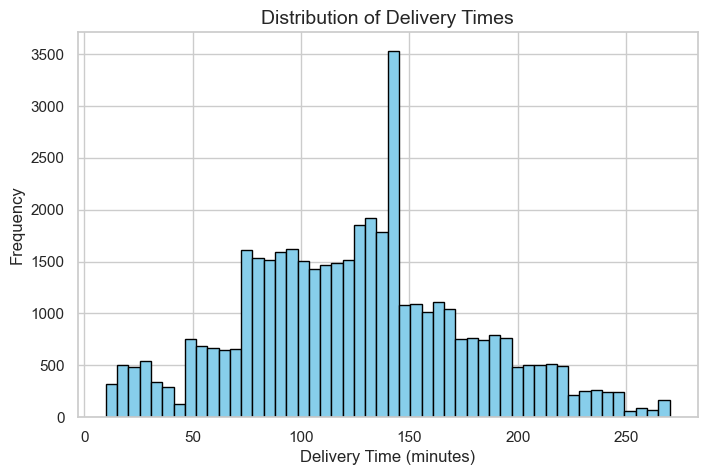

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\3766967078.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Delivery_Time"], shade=True, color="red")


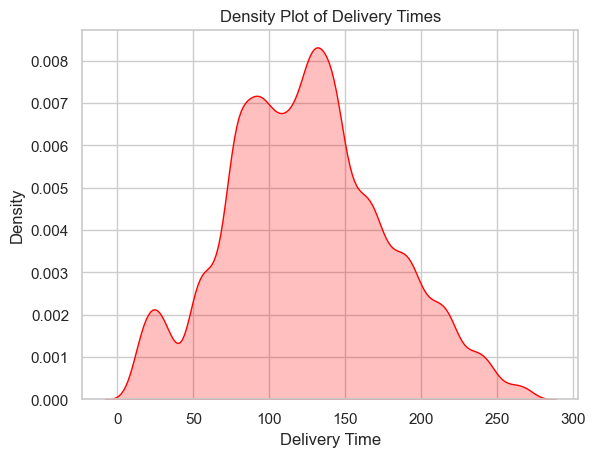

In [31]:
# Distribution of delivery time
plt.figure(figsize=(8,5))
plt.hist(df["Delivery_Time"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Delivery Times", fontsize=14)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

sns.kdeplot(df["Delivery_Time"], shade=True, color="red")
plt.title("Density Plot of Delivery Times")
plt.xlabel("Delivery Time")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\203629570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Order_Hour", y="Delivery_Time", palette="Set2")


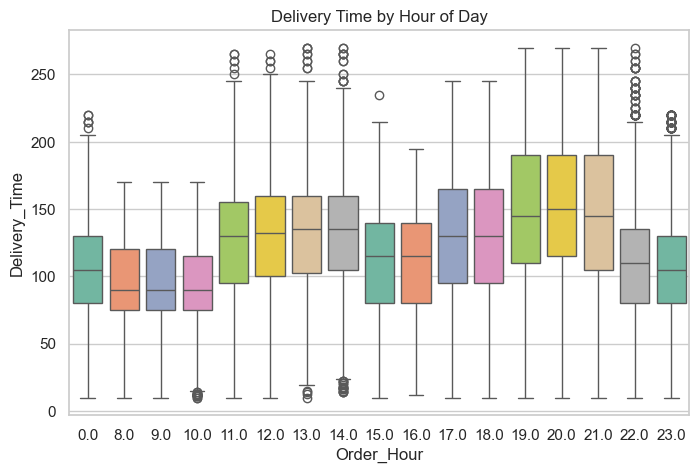

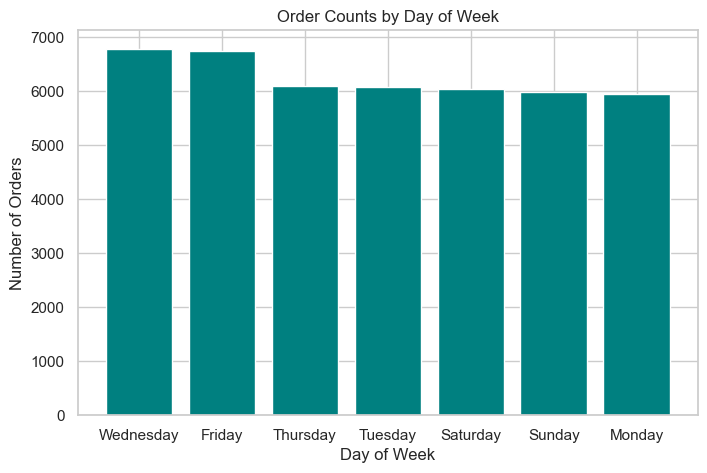

In [32]:
# Time-based Trends
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Order_Hour", y="Delivery_Time", palette="Set2")
plt.title("Delivery Time by Hour of Day")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(df["Order_DayName"].value_counts().index, df["Order_DayName"].value_counts().values, color="teal")
plt.title("Order Counts by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

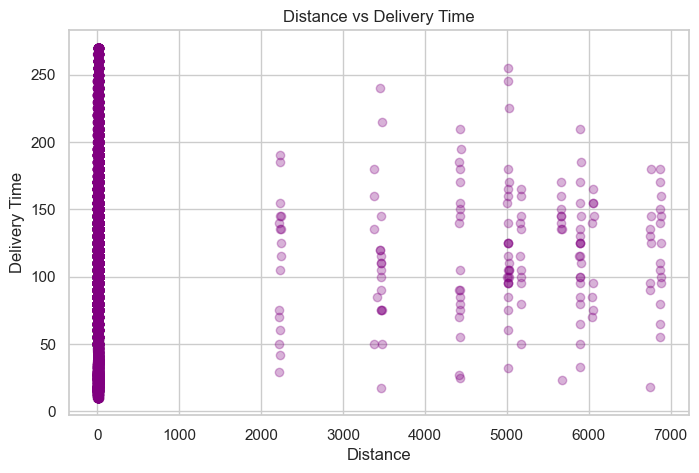

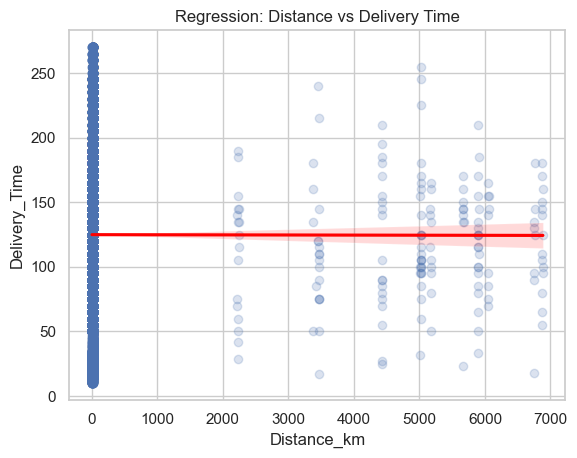

In [33]:
# Distance vs Delivery Time

plt.figure(figsize=(8,5))
plt.scatter(df["Distance_km"], df["Delivery_Time"], alpha=0.3, color="purple")
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance")
plt.ylabel("Delivery Time")
plt.show()

sns.regplot(data=df, x="Distance_km", y="Delivery_Time", scatter_kws={"alpha":0.2}, line_kws={"color":"red"})
plt.title("Regression: Distance vs Delivery Time")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\2896322841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Traffic", y="Delivery_Time", palette="Pastel1")


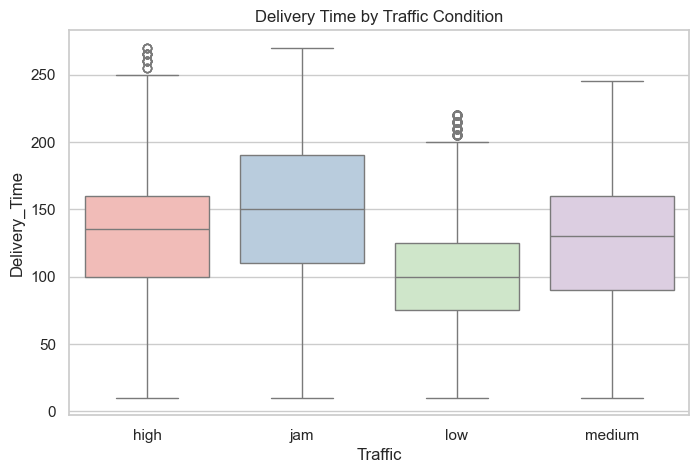

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\2896322841.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Weather", y="Delivery_Time", palette="muted")


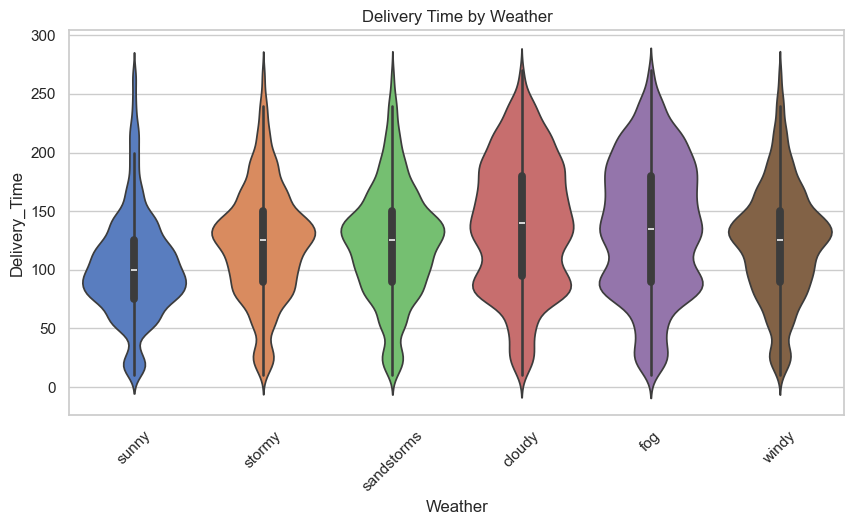

In [34]:
# Traffic & Weather Impact
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Traffic", y="Delivery_Time", palette="Pastel1")
plt.title("Delivery Time by Traffic Condition")
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="Weather", y="Delivery_Time", palette="muted")
plt.title("Delivery Time by Weather")
plt.xticks(rotation=45)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\478803006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Vehicle", y="Delivery_Time", palette="Set3")


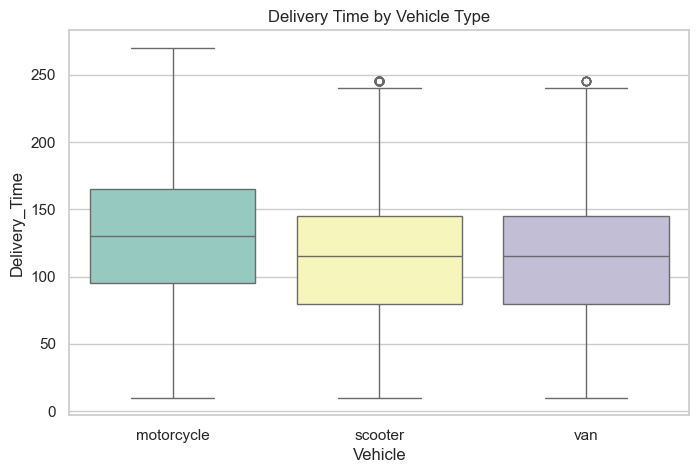

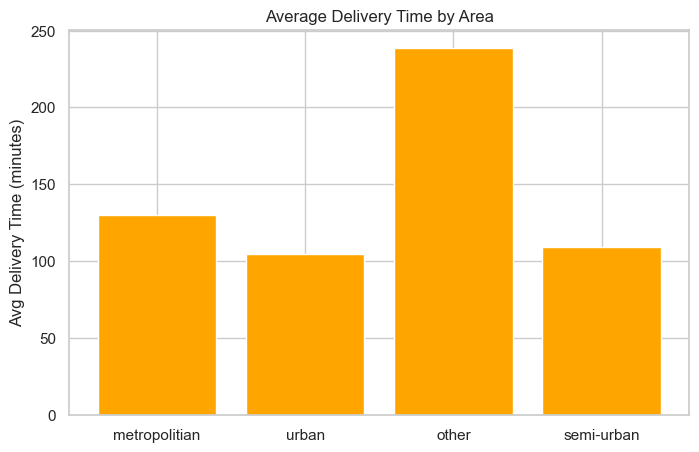

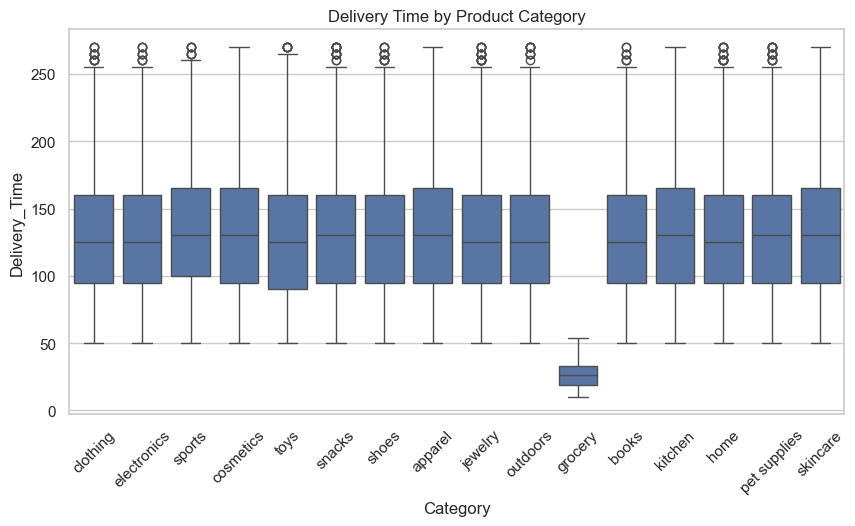

In [35]:
# Vehicle, Area, Category
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Vehicle", y="Delivery_Time", palette="Set3")
plt.title("Delivery Time by Vehicle Type")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(df["Area"].value_counts().index, df.groupby("Area")["Delivery_Time"].mean().values, color="orange")
plt.title("Average Delivery Time by Area")
plt.ylabel("Avg Delivery Time (minutes)")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Category", y="Delivery_Time")
plt.title("Delivery Time by Product Category")
plt.xticks(rotation=45)
plt.show()

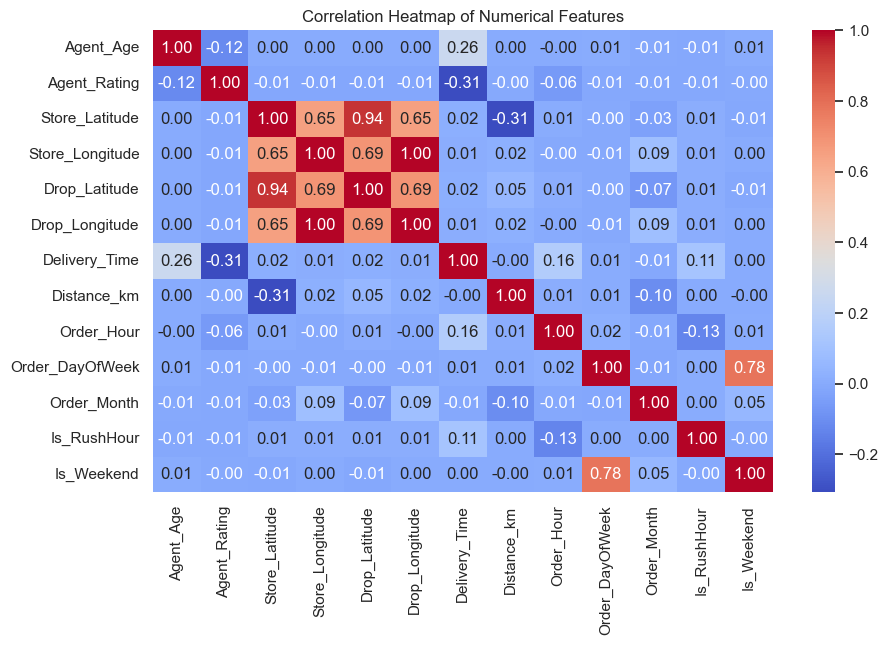

In [36]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ["Traffic", "Weather", "Area", "Vehicle", "Category"] 
df_encoded = df.copy() 
le = LabelEncoder() 
for col in cat_cols: 
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [38]:
# Define Features & Target
useful_cols = [ "Agent_Age", 
               "Agent_Rating", 
               "Traffic", 
               "Weather", 
               "Is_RushHour",
               "Is_Weekend",
               "Order_Hour",
               "Area",
               "Vehicle", 
               "Category", 
               "Distance_km" ]

In [39]:
X = df_encoded[useful_cols] 
y = df_encoded["Delivery_Time"]

In [40]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [41]:
# Train Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
import mlflow 
import mlflow.sklearn


# hyperparameter search space
param_grids = { 
    "Decision Tree": {
        "max_depth": randint(3, 20), 
        "min_samples_split": randint(2, 10), 
        "min_samples_leaf": randint(1, 5) 
        },
     "Random Forest": { 
         "n_estimators": randint(50, 200), 
         "max_depth": randint(5, 20), 
         "min_samples_split": randint(2, 10), 
         "min_samples_leaf": randint(1, 5) 
         },
    "Gradient Boosting": { 
        "n_estimators": randint(50, 200), 
        "learning_rate": uniform(0.01, 0.3), 
        "max_depth": randint(3, 10)
        },
    "SVR": { 
        "C": uniform(0.1, 10), 
        "epsilon": uniform(0.01, 1), 
        "kernel": ["linear", "rbf", "poly"]
        },
    "XGBoost": { 
        "n_estimators": randint(50, 200), 
        "learning_rate": uniform(0.01, 0.3), 
        "max_depth": randint(3, 10), 
        "subsample": uniform(0.6, 0.4) 
    }
}


# models 
models = { "Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42), 
          "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
          "Decision Tree": DecisionTreeRegressor(random_state=42),
          "Support Vector Regressor": SVR(kernel="rbf"),
          "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
            }

In [42]:
results = {}

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# MLflow Tracking

mlflow.set_experiment("Delivery Time Prediction - Tuned Models")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
for name, model in models.items():
    with mlflow.start_run(run_name=name): # Hyperparameter tuning if available
        if name in param_grids: 
            search = RandomizedSearchCV( 
                model, param_distributions=param_grids[name], 
                n_iter=20, cv=3, scoring="neg_mean_squared_error", 
                random_state=42, n_jobs=-1 ) 
            search.fit(X_train, y_train) 
            best_model = search.best_estimator_ 
            best_params = search.best_params_ 
            # Log best parameters
            mlflow.log_params(best_params) 
        else: 
            best_model = model.fit(X_train, y_train)
            best_params = {} 
            
        # Predict 
        y_pred = best_model.predict(X_test) 
        
        # Metrics 
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred) 
        r2 = r2_score(y_test, y_pred) 

        results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
        
        # Log metrics 
        mlflow.log_metric("RMSE", rmse) 
        mlflow.log_metric("MAE", mae) 
        mlflow.log_metric("R2", r2)
        
         # Log model with correct flavor
        if "XGB" in name:
            mlflow.xgboost.log_model( 
                xgb_model=best_model, 
                artifact_path=name.replace(" ", "_") + "_model")
        else:
            mlflow.sklearn.log_model(sk_model=best_model, 
                artifact_path=name.replace(" ", "_") + "_model")
            
        print(f"{name} Completed .")

2025/10/01 22:28:50 INFO mlflow.tracking.fluent: Experiment with name 'Delivery Time Prediction - Tuned Models' does not exist. Creating a new experiment.
2025/10/01 22:31:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/01 22:31:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression Completed .
🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/47eccd23c3a844b79c01edd1801e1ef3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


2025/10/01 22:32:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/01 22:32:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest Completed .
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/bbe2e7945c114950b5a30f2c5b0f08e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


2025/10/01 22:33:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/01 22:33:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting Completed .
🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/0ca0aba5328a41019c3d242ac3fc4d5b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


2025/10/01 22:33:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/01 22:33:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree Completed .
🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/4e0f1e9d2217417da1c00c084c99d5f8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


2025/10/01 22:34:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/01 22:35:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Support Vector Regressor Completed .
🏃 View run Support Vector Regressor at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/311d7e4fd95045f0a10bcf08d8e42c2d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


2025/10/01 22:35:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:1028: UserWarning: [22:35:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/10/01 22:35:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost Completed .
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/190647272504744062/runs/3e74d55096714b5bbc3aa249e877f851
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/190647272504744062


In [44]:
results_df = pd.DataFrame(results).T 
results_df

,RMSE,MAE,R2
Linear Regression,44.084346,33.922821,0.284316
Random Forest,22.468656,17.472238,0.814088
Gradient Boosting,22.223335,17.336709,0.818126
Decision Tree,23.336975,17.777774,0.799441
Support Vector Regressor,49.911556,39.770682,0.082608
XGBoost,22.201617,17.322945,0.818481


In [45]:
# Visualization
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\1387727917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="viridis")
C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\1387727917.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="MAE", data=results_df, palette="coolwarm")
C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\1387727917.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="R2", data=results_df, palette="Set2")


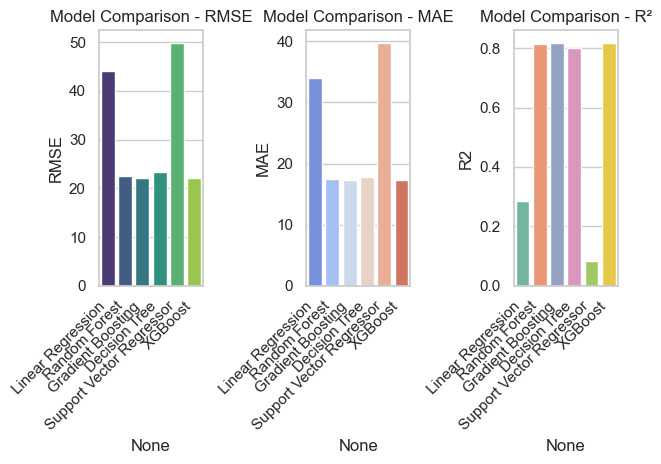

In [46]:
# Plot RMSE 
plt.subplot(1,3,1) 
sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="viridis") 
plt.xticks(rotation=45, ha="right") 
plt.title("Model Comparison - RMSE")

# Plot MAE 
plt.subplot(1,3,2) 
sns.barplot(x=results_df.index, y="MAE", data=results_df, palette="coolwarm") 
plt.xticks(rotation=45, ha="right") 
plt.title("Model Comparison - MAE")

# Plot R2 
plt.subplot(1,3,3) 
sns.barplot(x=results_df.index, y="R2", data=results_df, palette="Set2") 
plt.xticks(rotation=45, ha="right") 
plt.title("Model Comparison - R²")

plt.tight_layout() 
plt.show()

In [47]:
# # Example new order
# new_data = pd.DataFrame([{
#     "Agent_Age": 28,
#     "Agent_Rating": 4.7,
#     "Traffic": le.fit(df["Traffic"]).transform(["jam"])[0],   # Example encoding
#     "Weather": le.fit(df["Weather"]).transform(["sunny"])[0],
#     "Is_RushHour": 1,
#     "Is_Weekend": 0,
#     "Order_Hour": 19,
#     "Area": le.fit(df["Area"]).transform(["urban"])[0],
#     "Vehicle": le.fit(df["Vehicle"]).transform(["scooter"])[0],
#     "Category": le.fit(df["Category"]).transform(["grocery"])[0],
#     "Distance_km": 4.5
# }])

# # Predictions across all models
# for name, model in best_model.items():
#     pred = model.predict(new_data)[0]
#     print(f"{name} → Predicted Delivery Time = {pred:.2f} minutes")

In [48]:
cat_cols = ["Traffic", "Weather", "Area", "Vehicle", "Category"]

# Print unique values for each categorical column
for col in cat_cols:
    print(f"\n {col} → Unique Values:")
    print(df[col].unique())


 Traffic → Unique Values:
['high' 'jam' 'low' 'medium']

 Weather → Unique Values:
['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy']

 Area → Unique Values:
['urban' 'metropolitian' 'semi-urban' 'other']

 Vehicle → Unique Values:
['motorcycle' 'scooter' 'van']

 Category → Unique Values:
['clothing' 'electronics' 'sports' 'cosmetics' 'toys' 'snacks' 'shoes'
 'apparel' 'jewelry' 'outdoors' 'grocery' 'books' 'kitchen' 'home'
 'pet supplies' 'skincare']


In [56]:
# Register a model
result = mlflow.register_model(
     # Make sure the artifact_path matches exactly what during log_model.
    model_uri="runs:/3e74d55096714b5bbc3aa249e877f851/XGBoost_model",  
    name="XGBoost_RegModel"                     # registry name
)

Registered model 'XGBoost_RegModel' already exists. Creating a new version of this model...
2025/10/01 22:36:21 WARNING mlflow.tracking._model_registry.fluent: Run with id 3e74d55096714b5bbc3aa249e877f851 has no artifacts at artifact path 'XGBoost_model', registering model based on models:/m-0cc85a7892ec4215bf3cfacea01ea75b instead
2025/10/01 22:36:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost_RegModel, version 1
Created version '1' of model 'XGBoost_RegModel'.


In [58]:
# load model
import mlflow.pyfunc
# Load version 1 of your model
loaded_model = mlflow.pyfunc.load_model("models:/XGBoost_RegModel/1")

In [60]:
y_pred = loaded_model.predict(X_test)

In [62]:
y_pred[:5]

array([165.07143, 192.23645, 129.3744 , 170.77151,  73.46477],
      dtype=float32)

In [64]:
# Example new order
new_data = pd.DataFrame([{
    "Agent_Age":37,
    "Agent_Rating": 4.9,
    "Traffic": le.fit(df["Traffic"]).transform(["high"])[0],   # Example encoding
    "Weather": le.fit(df["Weather"]).transform(["sunny"])[0],
    "Is_RushHour": 0,
    "Is_Weekend": 1,
    "Order_Hour": 11,
    "Area": le.fit(df["Area"]).transform(["urban"])[0],
    "Vehicle": le.fit(df["Vehicle"]).transform(["motorcycle"])[0],
    "Category": le.fit(df["Category"]).transform(["clothing"])[0],
    "Distance_km":4.5
}])

In [66]:
ans = loaded_model.predict(new_data)[0]
ans

108.15604